# Домашнее задание 2

Используя датасет [STUDENT ALCOHOL CONSUMPTION](https://archive.ics.uci.edu/ml/datasets/STUDENT+ALCOHOL+CONSUMPTION#) и статью "USING	DATA	MINING	TO	PREDICT	SECONDARY SCHOOL	STUDENT	ALCOHOL	CONSUMPTION" выполните следующие задания:

### Загружаем датасет:

In [275]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy as sp
import pylab as plt
import warnings
warnings.filterwarnings('ignore')

In [93]:
df1 = pd.read_csv('student-mat.csv', sep=';')
df2 = pd.read_csv('student-por.csv', sep=';')
df = pd.DataFrame()
list_ = []
list_.append(df1)
list_.append(df2)
df = pd.concat(list_, ignore_index = True)

In [94]:
df.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10


In [95]:
df.tail(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
1041,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
1042,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10
1043,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,4,10,11,11


### Предобработка (Max 2)
- Приведите описание признаков датасета на русском языке с указанием типа данных (0.3 балла)
- Описание предобработки данных (1.7)
    - Проверьте наличие пропусков. В случае наличия пропусков заполните их медианными значениями (0.3)
    - Удалите признаки G1 и G2 (0.3)
    - Подсчитайте количество людей у которых матери с образованием "0" (0.3)
    - Преобразуйте все номинальные признаки в несколько признаков с бинарным значение (0.3)
    - Используя объект [SelectKBest](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest) с параметром [f_regression](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html#sklearn.feature_selection.f_regression)  выберите два признака, которые наиболее сильно связаны с признаком G3 (0.5)

### описание признаков датасета на русском языке с указанием типа данных:
- school - тип школы (GP - Gabriel Pereira или MS - Mousinho da Silveira) -- бинарный
- sex - пол(F-женский, M-мужской)-- бинарный
- age - возраст (от 15 до 22) -- числовой
- address - среда обитания студента (U -urban или R-rural) --бинарный
- famsize - размер семьи (LE3 - меньше или равно 3 или GT3- больше 3) -- бинарный
- Pstatus - в каких отношениях состоят родители студента (T - живут вместе, A - раздельно) -- бинарный
- Medu - образование матери (0-никакого, 1-начальное образование(4 класса), 2-от 5 до 9 классов, 3-среднеспециальное или 4 -высшее) числовой
- Fedu - образование отца (0-никакого, 1-начальное образование(4 класса), 2-от 5 до 9 классов, 3-среднеспециальное или 4 -высшее) числовой
- Mjob - работа матери (teacher, health care related, civil service (administrative or police), at_home и другие) номинальный
- Fjob - работа отца (teacher-учитель, health care related - связано со здравоохранением, civil service - госслужба (administrative or police), at_home-д\х и другие) номинальный
- reason - причина выбора школы (близко к дому-home, репутация школы-reputation, предпочтение некоторым предметам - course или другие причины - other) -- номинальный
- guardian - опекун (mother, father или other) -- номинальный
- traveltime - время от дома до школы (1 - меньше 15 мин, 2 -от 15 до 30 мин, 3 - от 30 мин до 1 часа, 4 - больше 1 часа) числовой
- studytime -количество часов обучения в неделю (1-меньше 2 часов, 2- от 2 до 5 часов, 3 - от 5 до 10 часов, 4- больше 10 часов) числовой
- failures -  количество ранее не сданных предметов (n если  1<=n< 3, иначе 4) числовой
- schoolsup - дополнительные занятия (yes или no) бинарный
- famsup - помощь семьи при выполнении заданий (yes или no) бинарный
- paid - дополнительные платные занятия (yes или no) бинарный
- activities - внеклассная деятельность (yes или no) - бинарный
- nursery - посещал ли детский сад (yes или no) - бинарный
- higher - желание высшего образования (yes или no) -  бинарный
- internet - домашний интернет (yes или no) - бинарный
- romantic - состоит в романтических отношениях (yes или no) - бинарный
- famrel - насколько хорошие отношения в семье (от 1 -очень плохие до 5 -превосходные) - числовой
- freetime - наличие свободного времени после школы (от 1 - очень мало до 5 - очень много) -- числовой
- goout - гуляет с друзьями (от 1 - очень редко до 5 - очень часто) - числовой
- Dalc - употребление алкоголя в будние дни (от 1 - очень редко до 5 - очень часто) -  числовой
- Walc - употребление алкоголя в выходные дни (от 1 - очень редко до 5 - очень часто) -  числовой
- health - текущее состояние здоровья (от 1 - очень плохое до 5 - очень хорошее) - числовой
- absences -  количество школьных пропусков (от 0 до 93) - числовой
- G1 - оценка за первый период (от 0 до 20) - числовой
- G2 - оценка за второй период (от 0 до 20) - числовой
- G3 - финальная оценка (от 0 до 20) - числовой 

прогнозируемая переменная:

- alc - еженедельное потребление алкоголя (от 1 - очень мало до 5 - очень много) - числовой

## Предобработка данных

### проверяем наличие пропусков в датасете:

In [96]:
for col_name in df.columns:
    print (col_name,end=": ")
    print (sum(df[col_name].isnull()))

school: 0
sex: 0
age: 0
address: 0
famsize: 0
Pstatus: 0
Medu: 0
Fedu: 0
Mjob: 0
Fjob: 0
reason: 0
guardian: 0
traveltime: 0
studytime: 0
failures: 0
schoolsup: 0
famsup: 0
paid: 0
activities: 0
nursery: 0
higher: 0
internet: 0
romantic: 0
famrel: 0
freetime: 0
goout: 0
Dalc: 0
Walc: 0
health: 0
absences: 0
G1: 0
G2: 0
G3: 0


#### Пропусков не найдено. Теперь удалим признаки G1 и G2:

In [97]:
df.drop(['G1', 'G2'], axis=1, inplace=True)

In [98]:
df.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,10


#### Посчитаем количество людей у которых матери с образованием "0":

In [99]:
noedu = len(df[df['Medu'] == 0]['Medu'])
noedu

9

#### Преобразуем все номинальные признаки (таких 4: Mjob, Fjob, reason, guardian) в несколько признаков с бинарным значением:

In [100]:
df_nonbinary = pd.get_dummies(df[['Mjob', 'Fjob', 'reason', 'guardian']])
df_nonbinary.head(3)

,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0


#### Заменим в таблице номинальные признаки на соответствующие им бинарные:

In [101]:
df.drop(['Mjob', 'Fjob', 'reason', 'guardian'], axis=1, inplace=True)

In [102]:
print (df.shape)

(1044, 27)


In [103]:
data = pd.concat((df, df_nonbinary), axis=1)
data = pd.DataFrame(data)
print (data.shape)
print (data.columns)

(1044, 44)
Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G3',
       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other'],
      dtype='object')


#### Сделаем значения бинарных признаков равными 0 и 1:

In [104]:
binary_columns = data[['school', 'sex','address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities',
                      'nursery', 'higher', 'internet', 'romantic']].columns
binary_columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup',
       'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [105]:
data.at[data['school'] == 'GP', 'school'] = 0
data.at[data['school'] == 'MS', 'school'] = 1
data['school'].describe()

count     1044
unique       2
top          0
freq       772
Name: school, dtype: int64

#### Автоматизируем процесс:

In [106]:
data_describe = data.describe(include=[object])
data_describe

,school,sex,address,famsize,Pstatus,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044
unique,2,2,2,2,2,2,2,2,2,2,2,2,2
top,0,F,U,GT3,T,no,yes,no,no,yes,yes,yes,no
freq,772,591,759,738,923,925,640,824,528,835,955,827,673


In [107]:
for col in binary_columns[1:]:
    top = data_describe[col]['top']
    top_items = data[col] == top
    data.loc[top_items, col] = 0
    data.loc[np.logical_not(top_items), col] = 1

#### Посмотрим на результат:

In [108]:
data[binary_columns].describe()

,school,sex,address,famsize,Pstatus,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044
unique,2,2,2,2,2,2,2,2,2,2,2,2,2
top,0,0,0,0,0,0,0,0,0,0,0,0,0
freq,772,591,759,738,923,925,640,824,528,835,955,827,673


#### В итоге получим следующую таблицу:

In [110]:
data.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,0,18,0,0,1,4,4,2,2,...,0,0,1,1,0,0,0,0,1,0
1,0,0,17,0,0,0,1,1,1,2,...,1,0,0,1,0,0,0,1,0,0
2,0,0,15,0,1,0,1,1,1,2,...,1,0,0,0,0,1,0,0,1,0


####  Выберем два признака, которые наиболее сильно связаны с признаком G3:

In [124]:
import sklearn 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [255]:
cols = [col for col in data.columns if col not in ['G3']]
X = data[cols]
y = data['G3']
X.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,0,18,0,0,1,4,4,2,2,...,0,0,1,1,0,0,0,0,1,0
1,0,0,17,0,0,0,1,1,1,2,...,1,0,0,1,0,0,0,1,0,0
2,0,0,15,0,1,0,1,1,1,2,...,1,0,0,0,0,1,0,0,1,0


In [163]:
Kbest = sklearn.feature_selection.SelectKBest(score_func= f_regression, k=2)

In [164]:
fitted = Kbest.fit(X, y)
fit_col = fitted.get_support()
fit_col

array([False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False], dtype=bool)

In [165]:
fit_col = np.array(fit_col)
sas = np.where(fit_col == True)[0]
X.columns[sas]

Index(['failures', 'higher'], dtype='object')

#### Получили, что два признака, которые наиболее сильно связаны с признаком G3 -- это 'failures' и 'higher'.

##### Черновички

In [143]:
# selector=Kbest.fit(X,y)
# X_new = selector.transform(X)
# inv = selector.inverse_transform(X_new)# not needed to get the score
# df = pd.DataFrame(inv)
# df.head()

In [142]:
#important_features = Kbest.fit_transform(X, y)
#dff = pd.DataFrame(important_features)
#dff.head()

In [144]:
# cols = df.columns
# bt = df.apply(lambda x: x > 0)
# bt.apply(lambda x: list(cols[x.values]), axis=1)

### Регрессия (Max 4)
Для каждого из трех признаков, которые наиболее влияют на признак G3, используя кросс-валидацию (cross-validation) выполните, выполните следующее:

- На обучающей выборки обучите объект [Ridge](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) для различных alpha (0.2)
- Выберите alpha при котором RidgeCV лучше всего предсказывает значения (0.1)
- Подсчитайте метрику mean absolute error, mean squared error, median absolute error,r2 score(0.2)
- Max (0.5)
- ------------------------------------
- Создайте объекты [SGDRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor), используя все возможных варианты аргумента penalty(0.2)
- Обучите все полученных объекты на обучающей выборке (0.1)
- Подсчитайте метрику r2 score для всех объектов (0.2)
- Max (0.5)
- ------------------------------------
- Создайте объекты с параметрами max_depth = 1,3, 10 [GradientBoostingRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor) и для каждого объекта изменяйте количество n_estimators  от 100 до 1000 с шагом 100 (0.2)
- Подсчитайте метрику r2 score для всех объектов (0.1)
- Визуализируйте значения на графике (0.2)
- Max (0.5)
- -----------------------------------
- Используя все в библиотеке sklearn доступные регрессоры найдите самый лучший. (2.5)

#### Аналогично тому, что было проделано выше, найдем 3 признака, которые наиболее влияют на признак G3:

In [152]:
Kbest = sklearn.feature_selection.SelectKBest(score_func= f_regression, k=3)

In [153]:
fitted = Kbest.fit(X, y)
fit_col = fitted.get_support()
fit_col

array([False, False, False, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False], dtype=bool)

In [159]:
fit_col = np.array(fit_col)
sas = np.where(fit_col == True)[0]
X.columns[sas]

Index(['Medu', 'failures', 'higher'], dtype='object')

#### Получили, что три признака, которые наиболее сильно связаны с признаком G3 -- это 'Medu', 'failures' и 'higher'.

 ### Обучим объект Ridge: 
 создадим матрицу, которая вклюючает только один из трех самых важных признаков

In [256]:
X = X['failures']

In [257]:
X = X.as_matrix()
y = y.as_matrix()

In [258]:
X

array([0, 0, 3, ..., 0, 0, 0], dtype=int64)

In [259]:
y

array([ 6,  6, 10, ...,  9, 10, 11], dtype=int64)

In [251]:
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error

In [260]:
X.shape

(1044,)

In [261]:
y.shape

(1044,)

In [271]:
X = np.reshape(X, (1044, 1))
y = np.reshape(y, (1044, 1))

In [265]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state= 3333)

#### alpha при котором RidgeCV лучше всего предсказывает значения:

In [290]:
alphas = np.logspace(-10, 10, 6000)
ridgecv = RidgeCV(alphas=alphas).fit(X_train,y_train)
print('the best alpha is:', ridgecv.alpha_)

the best alpha is: 4.95582375008


#### Подсчитаем метрику mean absolute error, mean squared error, median absolute error, r2 score:

In [267]:
y_pred = ridgecv.predict(X_test)

##### mean absolute error:

In [268]:
mae = mean_absolute_error(y_test, y_pred)
print(mae)

2.61464733072


##### mean squared error:

In [246]:
mse = mean_squared_error(y_test, y_pred)
print(mse)

11.9875873251


##### median absolute error:

In [247]:
medae = median_absolute_error(y_test, y_pred)
print(medae)

2.09927659897


##### r2 score:

In [250]:
ridgecv.score(X_test, y_test)

0.13694413539649353

### SGDRegressor:

In [252]:
from sklearn.linear_model import SGDRegressor

#### Все значения penalty :  ‘none’, ‘l2’, ‘l1’, or ‘elasticnet’

#### Для none:

In [289]:
sgd_none = SGDRegressor(penalty='none').fit(X_train, y_train)
print('r2 score is:', sgd_none.score(X_test, y_test))

r2 score is: 0.13507778857


#### Для l2:

In [288]:
sgd_l2 = SGDRegressor(penalty='l2').fit(X_train, y_train)
print('r2 score is:', sgd_l2.score(X_test, y_test))

r2 score is: 0.136396061981


#### Для l1:

In [286]:
sgd_l1 = SGDRegressor(penalty='l1').fit(X_train, y_train)
print('r2 score is:', sgd_l1.score(X_test, y_test))

r2 score is: 0.135292382022


#### Для elasticnet:

In [287]:
sgd_el = SGDRegressor(penalty='elasticnet').fit(X_train, y_train)
print('r2 score is:', sgd_el.score(X_test, y_test))

r2 score is: 0.136639285902


###  GradientBoostingRegressor:

In [283]:
from sklearn.ensemble import GradientBoostingRegressor

#### max_depth=1:

In [314]:
def r2_score(max_depth):
    gbr = GradientBoostingRegressor(max_depth=max_depth)
    n_est = np.linspace(100, 1000, num=10, dtype=int)
    r2_on_num = []
    for number in n_est: 
        gbr.set_params(n_estimators=number) 
        gbr_fitted = gbr.fit(X_train, y_train)
        r2_on_num.append(gbr_fitted.score(X_test, y_test))
        print('for',number,'estimators' ,'r-squared is', gbr_fitted.score(X_test, y_test))
    plt.figure()
    plt.plot(n_est, r2_on_num, color = 'black')
    plt.xlabel('number of estimators')
    plt.ylabel('R-squared')
    plt.title('Model with max_depth=%s' % (max_depth))

for 100 estimators r-squared is 0.177114472761
for 200 estimators r-squared is 0.177085090581
for 300 estimators r-squared is 0.177085065597
for 400 estimators r-squared is 0.177085065578
for 500 estimators r-squared is 0.177085065578
for 600 estimators r-squared is 0.177085065578
for 700 estimators r-squared is 0.177085065578
for 800 estimators r-squared is 0.177085065578
for 900 estimators r-squared is 0.177085065578
for 1000 estimators r-squared is 0.177085065578


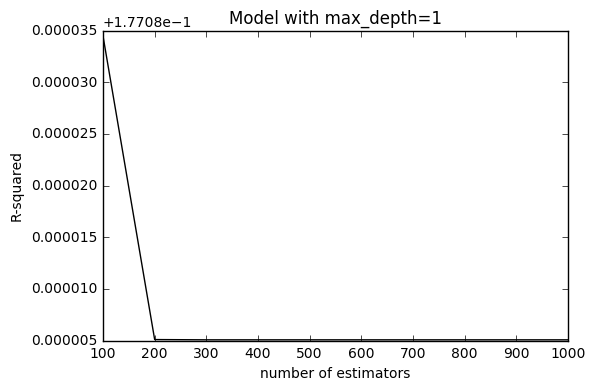

In [315]:
r2_score(max_depth=1)

#### max_depth=3:

for 100 estimators r-squared is 0.177085806635
for 200 estimators r-squared is 0.177085065598
for 300 estimators r-squared is 0.177085065578
for 400 estimators r-squared is 0.177085065578
for 500 estimators r-squared is 0.177085065578
for 600 estimators r-squared is 0.177085065578
for 700 estimators r-squared is 0.177085065578
for 800 estimators r-squared is 0.177085065578
for 900 estimators r-squared is 0.177085065578
for 1000 estimators r-squared is 0.177085065578


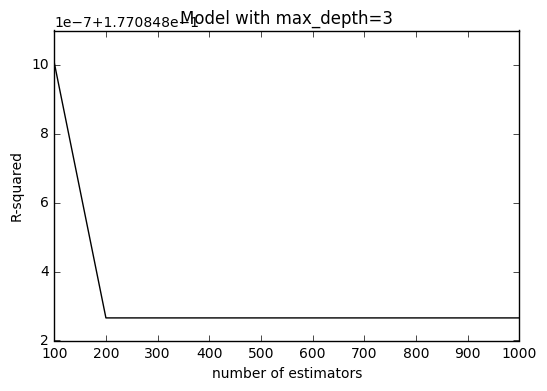

In [316]:
r2_score(max_depth=3)

#### max_depth=10:

for 100 estimators r-squared is 0.177085806635
for 200 estimators r-squared is 0.177085065598
for 300 estimators r-squared is 0.177085065578
for 400 estimators r-squared is 0.177085065578
for 500 estimators r-squared is 0.177085065578
for 600 estimators r-squared is 0.177085065578
for 700 estimators r-squared is 0.177085065578
for 800 estimators r-squared is 0.177085065578
for 900 estimators r-squared is 0.177085065578
for 1000 estimators r-squared is 0.177085065578


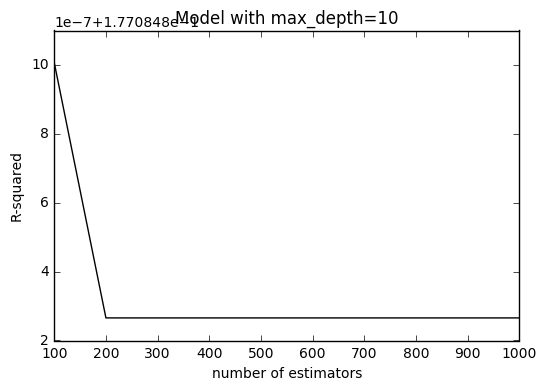

In [317]:
r2_score(max_depth=10)

### Используя в библиотеке sklearn доступные регрессоры найдите самый лучший:

#### DecisionTreeRegressor:

In [323]:
from sklearn.tree import DecisionTreeRegressor

In [358]:
tree = DecisionTreeRegressor().fit(X_train, y_train)
r2_tree = tree.score(X_test, y_test)
r2_tree

0.17708506557785275

In [359]:
values = {}
values['DecisionTreeRgressor'] = r2_tree

In [344]:
values

{'DecisionTreeRgressor': 0.17708506557785275}

#### KNeighborsRegressor:

In [327]:
from sklearn.neighbors import KNeighborsRegressor

In [360]:
neigh = KNeighborsRegressor().fit(X_train,y_train)
r2_neigh = neigh.score(X_test, y_test)
values['KNeighborsRegressor'] = r2_neigh
r2_neigh

0.15572702879106537

#### RandomForestRegressor:

In [318]:
from sklearn.ensemble import RandomForestRegressor

In [361]:
forest = RandomForestRegressor().fit(X_train,y_train)
r2_forest = forest.score(X_test, y_test)
values['RandomForestRegressor'] = r2_forest
r2_forest

0.16997714102159933

#### AdaBoostRegressor:

In [321]:
from sklearn.ensemble import AdaBoostRegressor

In [362]:
adaboost = AdaBoostRegressor().fit(X_train,y_train)
r2_adaboost = adaboost.score(X_test, y_test)
values['AdaBoostRegressor'] = r2_adaboost
r2_adaboost

0.16164957233298405

#### GradientBoostingRegressor:

In [325]:
from sklearn.ensemble import GradientBoostingRegressor

In [363]:
grad = GradientBoostingRegressor().fit(X_train,y_train)
r2_grad = grad.score(X_test, y_test)
values['GradientBoostingRegressor'] = r2_grad
r2_grad

0.17708580663479845

#### BaggingRegressor:

In [329]:
from sklearn.ensemble import BaggingRegressor

In [364]:
bag = BaggingRegressor().fit(X_train,y_train)
r2_bag = bag.score(X_test, y_test)
values['BaggingRegressor'] = r2_bag
r2_bag

0.17425261427580141

In [351]:
values

{'AdaBoostRegressor': 0.16128315659113879,
 'BaggingRegressor': 0.17590714273905428,
 'DecisionTreeRgressor': 0.17708506557785275,
 'GradientBoostingRegressor': 0.17708580663479845,
 'KNeighborsRegressor': 0.15572702879106537,
 'RandomForestRegressor': 0.17463268471029103}

In [365]:
inverse = [(value, key) for key, value in values.items()]
print ('наилучший с точки зрения R-squared регрессор -- это ', max(inverse)[1])

наилучший с точки зрения R-squared регрессор -- это  GradientBoostingRegressor


### Классификация (Max 4)
- В статье описано использование Random Forest для предсказания важности фактором вляющих на потребление алкоголя. Повторите эксперимент с использование объекта [RandomForest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier) и найдите наилучшие параметры. Обязательно наличие графика(ов) зависимости mean accuracy от различных параметров классификатора для объектов с различными параметрами (0.5)
- Обучите объект [GradientBoostingClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier)  и найдите для него наилучшие параметры. Обязательно наличие графика(ов) зависимости mean accuracy от различных параметров классификатора для объектов с различными параметрами (0.5)
- Обучите объект [AdaBoostClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)  и найдите для него наилучшие параметры. Обязательно наличие графика(ов) зависимости mean accuracy от различных параметров классификатора для объектов с различными параметрами (0.5)
- Найдите наилучший классификатор. Обязательно наличие графика(ов) зависимости mean accuracy от различных параметров классификатора для объектов с различными параметрами (2.5)

### эксперимент с использованием объекта RandomForest:
так же как и авторы статьи, объединим признаки Dalc и Walc в один под названием alc, тк предсказывать мы будем общее потребление алкоголя:

In [509]:
alc = []
for i in range (len(data['Dalc'])):
    if (5/7)*data['Dalc'][i] + (2/7)*data['Walc'][i] >= 3:   
        alc.append(int(1))
    else:
        alc.append(int(0))    

In [510]:
alc=np.asarray(alc)
alc

array([0, 0, 0, ..., 0, 1, 1])

In [512]:
df2 = pd.DataFrame(alc, columns=['alc'])
type(df2)

pandas.core.frame.DataFrame

удалим, согласно авторам статьи, признаки, слабо коррелирующие с потреблением алкоголя:

In [503]:
cols = [col for col in data.columns if col not in ['Fedu','famrel', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher','G3']]
df1 = data[cols]
df1.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,traveltime,studytime,failures,...,Mjob_other,Mjob_services,Mjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,0,18,0,0,1,4,2,2,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,17,0,0,0,1,1,2,0,...,0,0,0,1,0,0,0,1,0,0
2,0,0,15,0,1,0,1,1,2,3,...,0,0,0,0,0,1,0,0,1,0


Итак, мы имеем таблицу признаков Х и вектор истинных значений потребления алкоголя y:

In [513]:
X = df1
y = df2

In [499]:
#X = np.reshape(X, (1044, 36))
#y = np.reshape(y, (1044, 1))

In [506]:
type(X)

pandas.core.frame.DataFrame

найдем оптимальные параметры классификатора c помощью grid search:

In [432]:
from sklearn.ensemble import RandomForestClassifier

In [554]:
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.grid_search import GridSearchCV

n_estimators_range = np.linspace(1, 35, 35, dtype=int)
#min_leaf_range = np.linspace(10, 300,30, dtype=int)
max_features_range = np.linspace(1, 36, 36,dtype=int)
#criterion_range=('gini', 'entropy')
param_grid = dict(n_estimators=n_estimators_range, max_features=max_features_range)                 
cv = StratifiedShuffleSplit(y, n_iter=5,test_size=0.2, random_state=42)
grid = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=cv)
grid.fit(X, y)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))
print(type(cv))

The best parameters are {'n_estimators': 25, 'max_features': 7} with a score of 1.00
<class 'sklearn.cross_validation.StratifiedShuffleSplit'>


In [464]:
from sklearn.metrics import accuracy_score

In [514]:
X = X.as_matrix()
y = y.as_matrix()
type(X)

numpy.ndarray

Графически:

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35]


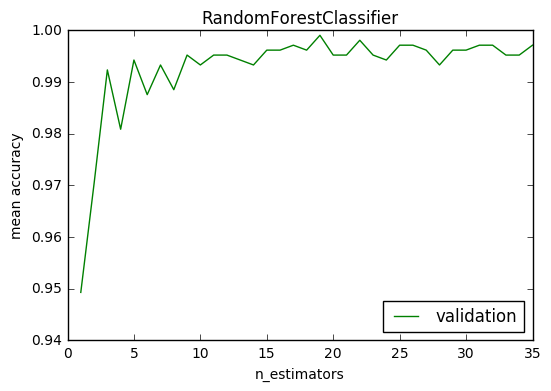

optimal n_estimators is:
19


In [555]:
accuracy_res = []
values = {}
sss = StratifiedShuffleSplit(y, n_iter=5,test_size=0.2, random_state=42)
for i in n_estimators_range:
    accuracy = []
    for train, test in sss:
        classifier = RandomForestClassifier(n_estimators=i, max_features=7)
        classifier = classifier.fit(X[train], y[train])
        y_pred = classifier.predict(X[test])
        accuracy.append(accuracy_score(y[test], y_pred)) 
    m = np.mean(np.array(accuracy))
    accuracy_res.append(m)
    values[m] = i
plt.plot(n_estimators_range, accuracy_res, c='g', label='validation')
plt.xlabel('n_estimators')
plt.ylabel('mean accuracy')
plt.title('RandomForestClassifier')
plt.legend(loc = 'lower right')
plt.show()
print('optimal n_estimators is:')
print(values[max(values)])

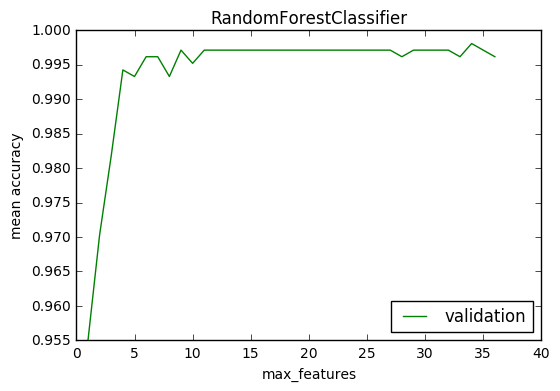

optimal max_features is:
34


In [556]:
accuracy_res = []
values = {}
sss = StratifiedShuffleSplit(y, n_iter=5,test_size=0.2, random_state=42)
for i in max_features_range:
    accuracy = []
    for train, test in sss:
        classifier = RandomForestClassifier(n_estimators=25, max_features=i)
        classifier = classifier.fit(X[train], y[train])
        y_pred = classifier.predict(X[test])
        accuracy.append(accuracy_score(y[test], y_pred)) 
    m = np.mean(np.array(accuracy))
    accuracy_res.append(m)
    values[m] = i
plt.plot(max_features_range, accuracy_res, c='g', label='validation')
plt.xlabel('max_features')
plt.ylabel('mean accuracy')
plt.title('RandomForestClassifier')
plt.legend(loc = 'lower right')
plt.show()
print('optimal max_features is:')
print(values[max(values)])

# Замечания

- В работе следует использовать библиотеку scikit-learn версии 0.18 и scipy версии 0.18.1